In [454]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import json
import ast
from wordcloud import WordCloud,STOPWORDS
from collections import OrderedDict, Counter

train_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/train.csv'
test_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/test.csv'
#train_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/train.csv'
#test_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/test.csv'

def str_to_list(x):
    return eval(x) if x and x != '#N/A' else []

list_cols = [
    'genres',
    'belongs_to_collection',
    'production_companies',
    'production_countries',
    'spoken_languages',
    'Keywords',
    'cast',
    'crew'
]

io_params = {
    'index_col': 'id',
    'converters': {col: str_to_list for col in list_cols}
}

# We can read the train and the test in one go using the concat function
train = pd.read_csv(train_path, **io_params)
train.info()
train.describe()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  3000 non-null   object 
 1   budget                 3000 non-null   int64  
 2   genres                 3000 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   3000 non-null   object 
 11  production_countries   3000 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       3000 non-null   object 
 15  stat

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,[],3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,[],1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,[],0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


BELONGS TO COLLECTION

In [455]:
for i, e in enumerate(train['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 []
3 []
4 []


In [456]:
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: 0 if (len(x) == 0) else 1)
sum(train['has_collection'])

train = train.drop(['belongs_to_collection'], axis=1)
train.head()

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection
id,,,,,,,,,,,,,,,,,,,,,
1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1
3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0
4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0
5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0


BUDGET

In [457]:
for i, e in enumerate(train['budget']):
    if e <=1e5:
        print(i, e)

4 0
7 0
8 0
11 0
17 0
22 0
23 0
24 0
25 0
31 0
33 0
36 0
38 0
40 0
48 0
52 0
53 0
55 0
56 0
58 0
62 0
67 0
71 0
73 0
78 0
89 0
91 0
93 0
95 0
97 0
102 0
103 0
104 0
116 0
117 0
118 0
126 0
132 0
136 0
138 0
141 0
145 0
146 0
148 0
150 0
151 0
152 0
154 0
157 0
161 0
165 0
166 0
170 0
171 0
177 0
181 0
182 0
189 0
192 0
193 0
195 0
206 0
208 0
212 0
218 0
221 0
224 0
225 0
232 0
233 0
235 0
237 0
240 0
242 0
243 0
244 0
253 0
254 11178
258 0
259 24554
260 0
262 0
264 0
267 27000
269 0
275 0
278 0
280 0
287 0
293 0
295 0
302 0
303 0
304 0
313 0
320 0
330 0
333 0
334 1
337 0
340 0
342 0
343 0
345 0
347 12
352 0
355 0
360 0
365 7000
367 0
368 0
370 0
379 0
383 0
386 0
392 0
395 0
396 0
397 0
402 0
403 0
404 0
409 0
416 0
417 0
425 0
427 0
435 0
436 0
441 0
442 0
443 0
445 0
451 0
452 0
454 0
455 0
460 0
463 0
465 0
469 113
475 0
479 0
480 0
484 0
493 0
498 0
500 0
502 0
504 0
508 60000
512 93
514 0
521 0
524 0
531 0
539 0
549 0
553 0
555 0
556 0
560 0
561 0
564 0
565 0
575 0
577 0
579 0
58

In [458]:
train['isBudgetDirty'] = train['budget'].apply(lambda x : 1 if x < 1e5 else 0)
mean_budget =train[train['budget'] >= 1e5]['budget'].mean()
mean_budget

31424185.22501162

In [459]:
train.loc[train.budget < 1e5, 'budget'] = mean_budget

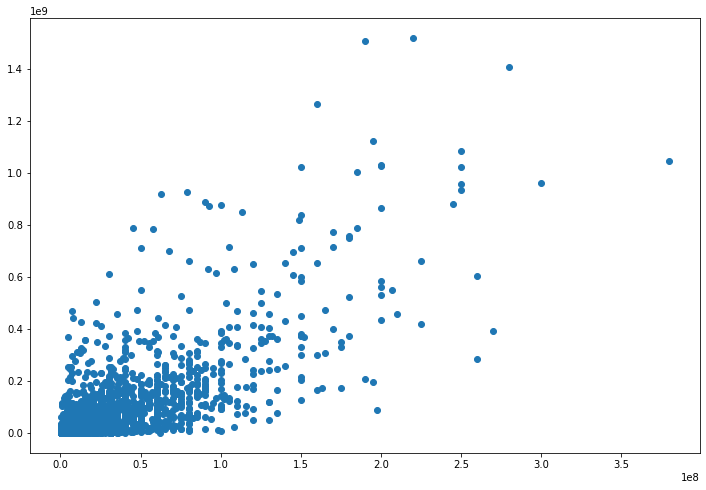

In [460]:
plt.figure(figsize=(12,8))
plt.scatter("budget", "revenue", data=train)
plt.show()

GENRES

In [461]:
for i, e in enumerate(train['genres'][:5]):
    for gen in e:
        print(gen['name'])

Comedy
Comedy
Drama
Family
Romance
Drama
Thriller
Drama
Action
Thriller


In [462]:
train['list_of_genres'] = train['genres'].apply(lambda x: [gen['name'] for gen in x])
train['genre_count'] = train['list_of_genres'].apply(lambda x: len(x))
train = train.drop(['genres'], axis=1)
train = train.drop(['list_of_genres'], axis=1)
train.head()

,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,status,tagline,title,Keywords,cast,crew,revenue,has_collection,isBudgetDirty,genre_count
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,1
2,4.000000e+07,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,4
3,3.300000e+06,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,1
4,1.200000e+06,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,2
5,3.142419e+07,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,1,2


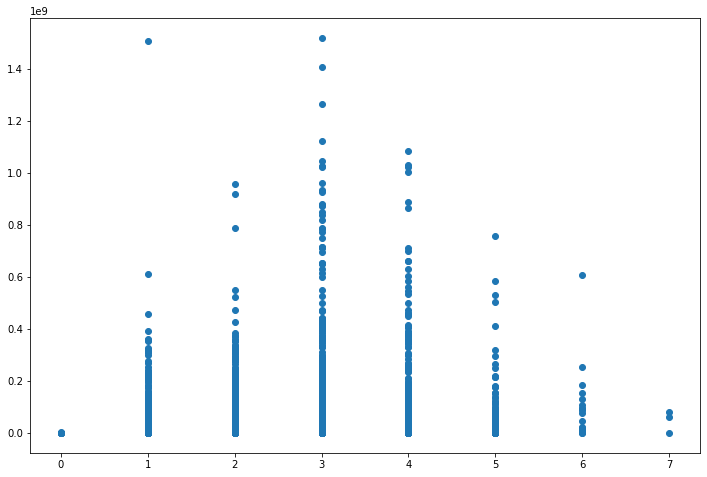

In [463]:
plt.figure(figsize=(12,8))
plt.scatter("genre_count", "revenue", data=train)
plt.show()

In [464]:
#train.head()
#list_of_genres = []
#for l in train['list_of_genres']:
#    for gen in l:
#        list_of_genres.append(gen)

#list_of_genres
#len(list_of_genres)
#unique_genres = set(list_of_genres)
#unique_genres
#len(unique_genres)
#Counter(list_of_genres).most_common(12)

HOMEPAGE

In [465]:
train['hasHomepage'] = train['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
train = train.drop(['homepage'], axis=1)

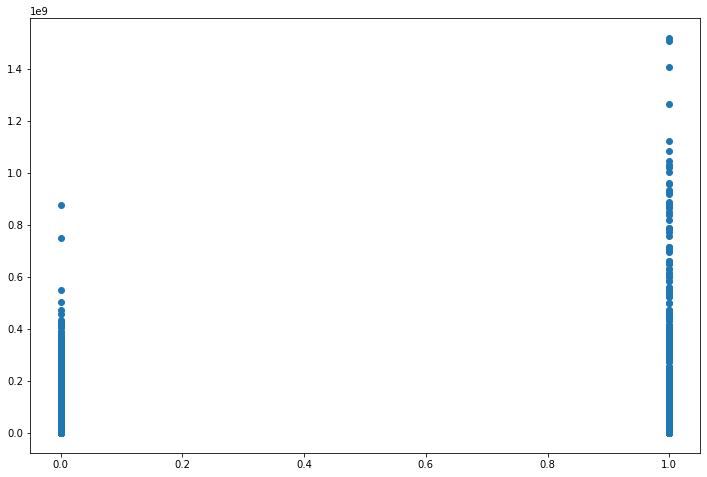

In [466]:
plt.figure(figsize=(12,8))
plt.scatter("hasHomepage", "revenue", data=train)
plt.show()

IMDB ID

In [467]:
train = train.drop(['imdb_id'], axis=1)


In [468]:
train

,budget,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,...,tagline,title,Keywords,cast,crew,revenue,has_collection,isBudgetDirty,genre_count,hasHomepage
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,1,0
2,4.000000e+07,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,4,0
3,3.300000e+06,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,1,1
4,1.200000e+06,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,2,1
5,3.142419e+07,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,...,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,0,1,2,0
2997,3.142419e+07,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,...,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,0,1,2,0
2998,6.500000e+07,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,...,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,0,0,4,0


ORIGINAL LANGUAGE

In [469]:
list_of_languages = []
for lan in train['original_language']:
    list_of_languages.append(lan)
print(Counter(list_of_languages))
unique_languages = set(list_of_languages)
len(unique_languages)

Counter({'en': 2575, 'fr': 78, 'ru': 47, 'es': 43, 'hi': 42, 'ja': 37, 'it': 24, 'ko': 20, 'cn': 20, 'zh': 19, 'de': 18, 'ta': 16, 'sv': 8, 'nl': 6, 'pt': 6, 'fa': 5, 'da': 5, 'ro': 4, 'tr': 3, 'hu': 3, 'te': 2, 'fi': 2, 'no': 2, 'pl': 2, 'ml': 2, 'sr': 1, 'cs': 1, 'mr': 1, 'el': 1, 'ur': 1, 'he': 1, 'ar': 1, 'nb': 1, 'vi': 1, 'bn': 1, 'id': 1})


36

In [470]:
train['is_english'] = train['original_language'].apply(lambda x: 1 if (x == 'en') else 0)
train = train.drop(['original_language'], axis=1)

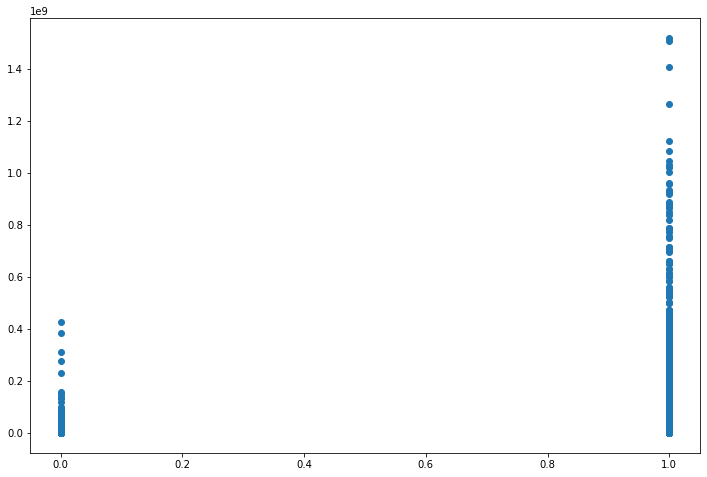

In [471]:
plt.figure(figsize=(12,8))
plt.scatter("is_english", "revenue", data=train)
plt.show()

ORIGINAL TITLE

In [472]:
train = train.drop(['original_title'], axis=1)

OVERVIEW

In [473]:
train = train.drop(['overview'], axis=1)

POPULARITY

In [474]:
train['logPop'] = train['popularity'].apply(lambda x: np.log(x)) #prova

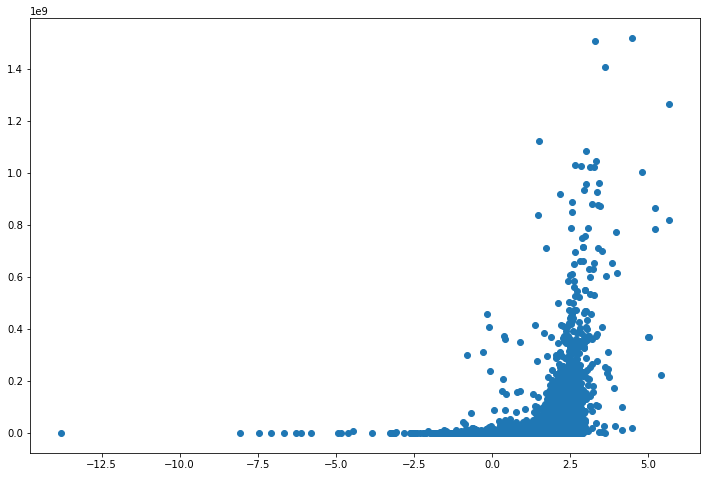

In [475]:
plt.figure(figsize=(12,8))
plt.scatter("logPop", "revenue", data=train)
plt.show()

In [476]:
train = train.drop(['logPop'], axis=1)

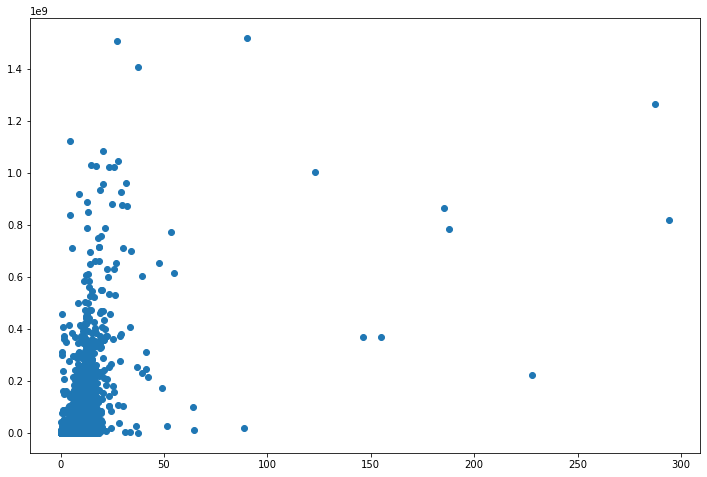

In [477]:
plt.figure(figsize=(12,8))
plt.scatter("popularity", "revenue", data=train)
plt.show()

POSTER PATH

In [478]:
train = train.drop(['poster_path'], axis=1)

PRODUCTION COMPANIES

In [479]:
for i, e in enumerate(train['production_companies']):
    for comp in e:
        print(comp['name'])

Paramount Pictures
United Artists
Metro-Goldwyn-Mayer (MGM)
Walt Disney Pictures
Bold Films
Blumhouse Productions
Right of Way Films
Ghost House Pictures
North Box Productions
Walt Disney Pictures
Jim Henson Productions
Jim Henson Company, The
Castle Rock Entertainment
United Artists
Twentieth Century Fox Film Corporation
Amercent Films
American Entertainment Partners L.P.
Interscope Communications
DreamWorks SKG
Jinks/Cohen Company
Double Feature Films
Jersey Films
Nina Saxon Film Design
Metro-Goldwyn-Mayer (MGM)
DreamWorks SKG
Cruise/Wagner Productions
Amblin Entertainment
Twentieth Century Fox Film Corporation
Blue Tulip Productions
Ronald Shusett/Gary Goldman
Digital Image Associates
Hypnopolis
DreamWorks SKG
Craven-Maddalena Films
BenderSpink
BBC Films
Headline Pictures
Magnolia Mae Films
Taeoo Entertainment
UK Film Council
Prescience
Aegis Film Fund
Kaleidoscope Films
Twentieth Century Fox Film Corporation
Current Entertainment
TF1 Films Production
Canal+
TPS Star
EuropaCorp
Sea 

KrautPack Entertainment
Dimension Films
Troublemaker Studios
Miramax
TriStar Pictures
Interscope Communications
Panorama
Film4
Drafthouse Films
Warp Films
Wild Bunch Distribution
Summit Entertainment
Robert Simonds Productions
Participant Media
Imagenation Abu Dhabi FZ
Furry Vengeance Productions
Paramount Pictures
France 3 Cinéma
The Kennedy/Marshall Company
Pathé Renn Productions
Banques Populaire Image 7
Canal+
CinéCinéma
C.R.R.A.V. Nord Pas de Calais
Région Nord-Pas-de-Calais
Working Title Films
Reel FX Creative Studios
Fox 2000 Pictures
Flower Films (II)
Bushwood Pictures
Never Been Kissed Productions
Fox 2000 Pictures
Wildgaze Films
Alan Greenspan Productions
Mars Media Beteiligungs
Flower Films (II)
ELC Productions Ltd.
Nu Image Films
Lionsgate
Millennium Films
Emmett/Furla Films
Equity Pictures Medienfonds GmbH & Co. KG IV
HBO Documentary
Whyaduck Productions
Columbia Pictures Corporation
American Zoetrope
Columbia Pictures Corporation
Bakshi Productions
Aspen Productions
Golde

Working Title Films
Atlas 3 Productions
Malpaso Productions
Warner Bros.
Tiny Ponies
Huayi Brothers
Ingenious Media
Fox 2000 Pictures
Scott Free Productions
Kanzaman
Nick Wechsler Productions
Big Screen Productions
Chockstone Pictures
Translux
TSG Entertainment
Vijaya Productions
Universal Pictures
Canal Plus
Dino De Laurentiis Company
Paramount Pictures
AVCO Embassy Pictures
Goldcrest Films International
International Film Investors
City Film
Bess Movie
Pentagrama Films
Universal Pictures
Great American Films Limited Partnership
Vestron Pictures
Columbia Pictures Corporation
Screen Gems
SKA Films
Universal Pictures
Original Film
Relativity Media
Big Kid Pictures
Egoli Tossell Film AG
Canal+
Arte France
Films en Stock
Castle Rock Entertainment
Columbia Pictures Corporation
Rio Dulce
Paper Street Films
Tom Sawyer Entertainment
Back Lot Pictures
StudioCanal
Film4
Anton Capital Entertainment (ACE)
The Ink Factory
Potboiler Productions
Amazon Prime Instant Video
Atlantic Entertainment Grou

Romanian National Center for Cinematography
BV McCann-Erickson
Mindshare Media
Comet Film Produktion GmbH
Avrora Media
Cobblestone Pictures
Whiskers Post Production
Arokaria
Full On Film Productions
Media Asia Film
Television Broadcasts Limited (TVB)
Castleberg Productions
Sandollar Productions
Universal Pictures
Dentsu
Relativity Media
Kennedy/Marshall Company, The
Captivate Entertainment
Metro-Goldwyn-Mayer (MGM)
Universal Pictures
Original Film
Fuji Television Network
Dentsu
One Race Films
China Film Co.
Québec Production Services Tax Credit
Media Rights Capital (MRC)
Abu Dhabi Film Commission
Colorado Office of Film, Television & Media
Crossbow Productions
Warner Bros.
Charles Chaplin Productions
First National Pictures
Columbia Pictures Corporation
Horizon Pictures (II)
Desert Flower Filmproductions
Desert Flower
Backup Films
Torus
Super Cassettes Industries Limited (T-Series)
Rogue Pictures
Phantom Four
Platinum Dunes
Relativity Media
Marvel Studios
Savoy Pictures
TriStar Picture

Industry Entertainment
Imagenation Abu Dhabi FZ
Hyde Park Entertainment
Agent Two
Brandt/Haas Productions
Columbia Pictures
Castle Rock Entertainment
Aspen Film Society
Warner Bros.
Arc Entertainment
Walt Disney Pictures
Studio Ghibli
Hakuhodo DY Media Partners
Mitsubishi
Nibariki
GNDHDDT
Nippon Television Network (NTV)
Film 4
Universal Pictures
Image Entertainment
Relativity Media
Rat Entertainment
Phantom Productions
Fox Star Studios
Non-Stop Productions
Warner Bros.
Don Bluth
DreamWorks SKG
The Montecito Picture Company
Quincy Jones-David Salzman Entertainment
Warner Bros.
DC Entertainment
Central Partnership
Amkart Studios
Russian Ministry of Culture
Likely Story
Playtone
Image Nation
New Line Cinema
Ingenious Media
Twentieth Century Fox Film Corporation
Samuel Goldwyn Films
Big Screen Productions
Red Hour Films
TSG Entertainment
Down Productions
Twentieth Century Fox Film Corporation
Blue Sky Studios
Twentieth Century Fox Animation
Fine & Mellow Productions
Paramount Pictures
Scot

Prelude Pictures
Lone Runner Entertainment
Kenio Films
Perfect Game, The
Perdido Productions
Harbor Picture Company
American Zoetrope
Focus Features
Amblin Entertainment
TriStar Pictures
Wild Bunch
Erfttal Film
Film Afrika Worldwide
Head Gear Films
Metrol Technology
Egoli Tossell Film
Construction Film
Screen Siren Pictures
Paramount Pictures
Miramax Films
Constantin Film Produktion
Don Carmody Productions
Unique Features
Mr. Smith Productions
Paramount Pictures
Cort/Madden Productions
ATR Films
MMP Erste Filmproduktions
Moviemakers Productions (MMP)
Authorized Pictures
LSL Productions
Blue Sky Studios
Twentieth Century Fox Animation
Screen Yorkshire
British Film Institute (BFI)
Creative Scotland
Film4
Warp Films
Crab Apple Films
Warner Bros.
Central Partnership
DisneyToon Studios
Twentieth Century Fox Film Corporation
SLM Production Group
Bavaria Film
Kings Road Entertainment
Don Carmody Productions
Caramel Films
EMI Films
Twentieth Century Fox Film Corporation
Permut Presentations
Sy

In [480]:
train['list_of_companies'] = train['production_companies'].apply(lambda x: [comp['name'] for comp in x])

In [481]:
list_of_companies = []
for l in train['list_of_companies']:
    for comp in l:
        list_of_companies.append(comp)

print(len(list_of_companies))
unique_companies = set(list_of_companies)
print(len(unique_companies))
top_20_comp_pair = Counter(list_of_companies).most_common(20)
top_20_comp = []
for p in top_20_comp_pair:
    top_20_comp.append(p[0])

8095
3695


In [482]:
train['companies_count'] = train['list_of_companies'].apply(lambda x: len(x))

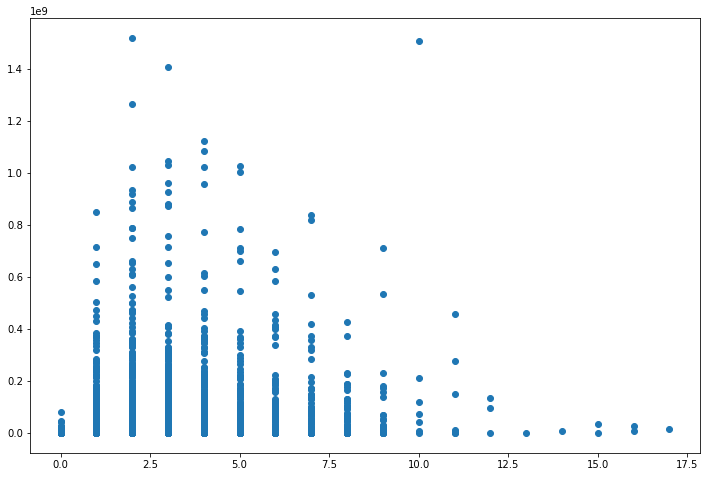

In [483]:
plt.figure(figsize=(12,8))
plt.scatter("companies_count", "revenue", data=train)
plt.show()

In [484]:
checked_companies = []
for i, l in enumerate(train['list_of_companies']):
    for comp in l:
        colName = 'is'+comp
        if(comp in top_20_comp and comp not in checked_companies):
            checked_companies.append(comp)
            train[colName] = pd.Series([1 if comp in x else 0 for x in train['list_of_companies']], index =list(range(1,3001)))


In [485]:
print(sum(train['isColumbia Pictures Corporation']))
top_20_comp_pair

61


[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30)]

In [486]:
train = train.drop(['production_companies'], axis=1)
train = train.drop(['list_of_companies'], axis=1)
train = train.drop(['companies_count'], axis=1)

In [487]:
train

,budget,popularity,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,...,isColumbia Pictures Corporation,isTriStar Pictures,isColumbia Pictures,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",...,0,0,0,0,0,0,0,0,0,0
2,4.000000e+07,8.248895,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",...,0,0,0,0,0,0,0,0,0,0
3,3.300000e+06,64.299990,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",...,0,0,0,0,0,0,0,0,0,0
4,1.200000e+06,3.174936,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",...,0,0,0,0,0,0,0,0,0,0
5,3.142419e+07,1.148070,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,"[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...",...,0,0,0,0,0,0,0,0,0,0
2997,3.142419e+07,3.727996,"[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...",...,0,0,0,0,0,0,0,0,0,0
2998,6.500000e+07,14.482345,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...",...,0,0,0,0,0,0,0,0,0,0


isWarner Bros.


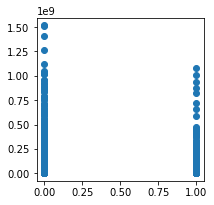

isUniversal Pictures


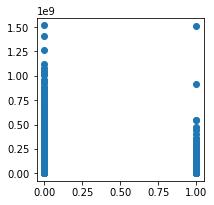

isParamount Pictures


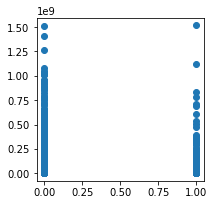

isTwentieth Century Fox Film Corporation


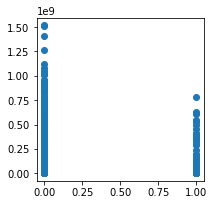

isColumbia Pictures


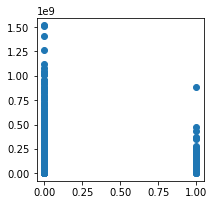

isMetro-Goldwyn-Mayer (MGM)


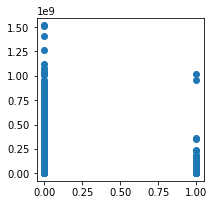

isNew Line Cinema


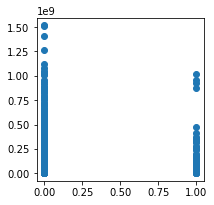

isTouchstone Pictures


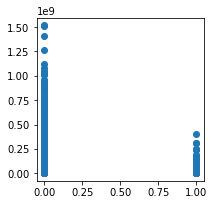

isWalt Disney Pictures


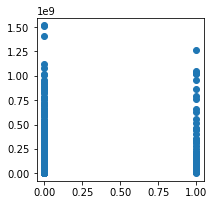

isColumbia Pictures Corporation


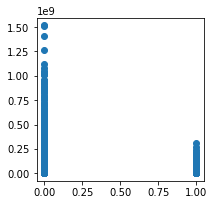

isTriStar Pictures


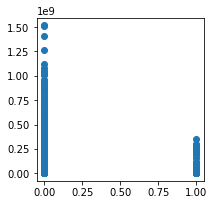

isRelativity Media


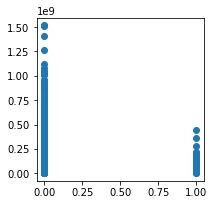

isCanal+


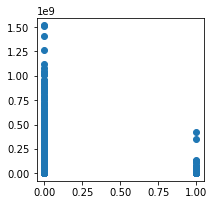

isUnited Artists


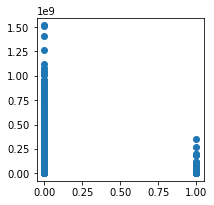

isMiramax Films


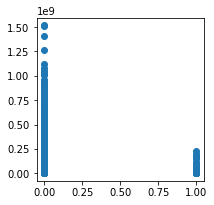

isVillage Roadshow Pictures


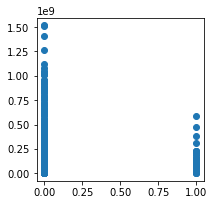

isRegency Enterprises


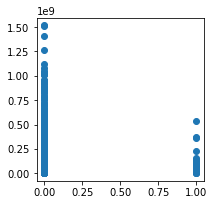

isBBC Films


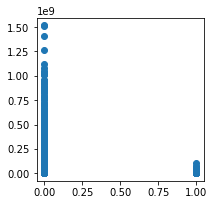

isDune Entertainment


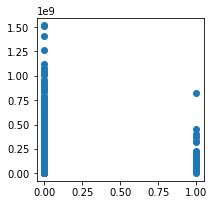

isWorking Title Films


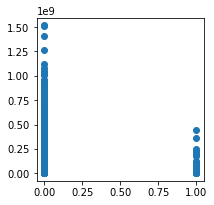

In [488]:
for comp in top_20_comp:
    col = 'is' + comp
    print(col)
    plt.figure(figsize=(3,3))
    plt.scatter(col, "revenue", data=train)
    plt.show()

PRODUCTION COUNTRIES

In [489]:
train[['production_countries', 'is_english']]
train = train.drop(['production_countries'], axis=1)

RELEASE DATE

In [490]:
date = '01/02/93'
dmy = date.split('/')
integer_map = map(int, dmy)
dmy_int = list(integer_map)
dmy_int

[1, 2, 93]

In [491]:
def fix_date(x):
    """
    Fixes dates which are in 20xx
    """
    year = x.split('/')[2]
    if int(year) <= 21:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))

In [492]:
train['release_date'] = train['release_date'].apply(lambda x: x.split('/'))

In [493]:
train['release_day'] = pd.Series([x[1] for x in train['release_date']], index =list(range(1,3001)))
train['release_day'] = train['release_day'].astype(int)
train['release_month'] = pd.Series([x[0] for x in train['release_date']], index =list(range(1,3001)))
train['release_month'] = train['release_month'].astype(int)
train['release_year'] = pd.Series([x[2] for x in train['release_date']], index =list(range(1,3001)))
train['release_year'] = train['release_year'].astype(int)
train.info()
train = train.drop(['release_date'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   budget                                    3000 non-null   float64
 1   popularity                                3000 non-null   float64
 2   release_date                              3000 non-null   object 
 3   runtime                                   2998 non-null   float64
 4   spoken_languages                          3000 non-null   object 
 5   status                                    3000 non-null   object 
 6   tagline                                   2403 non-null   object 
 7   title                                     3000 non-null   object 
 8   Keywords                                  3000 non-null   object 
 9   cast                                      3000 non-null   object 
 10  crew                                

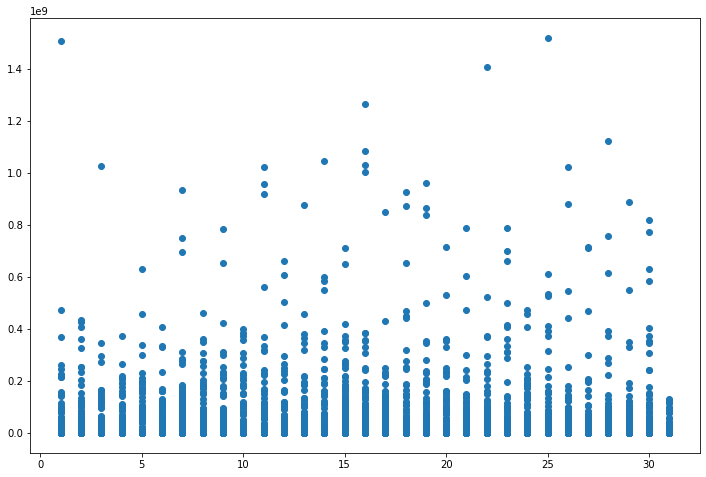

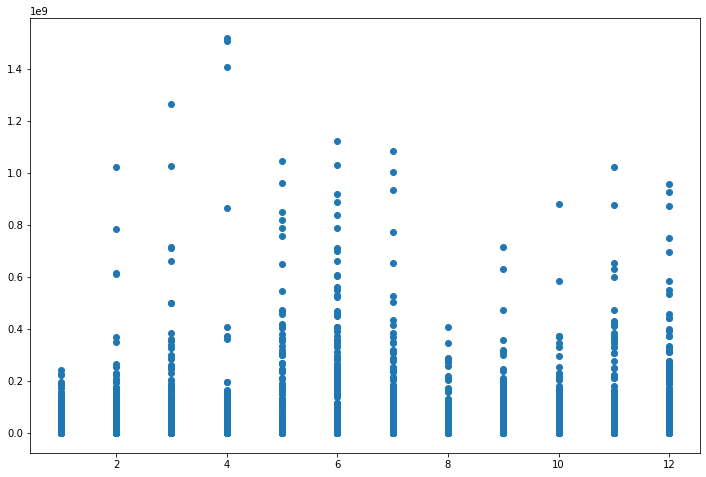

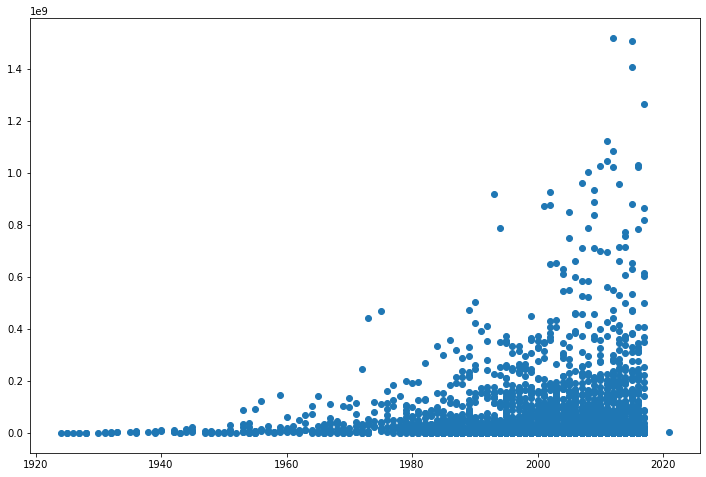

In [494]:
plt.figure(figsize=(12,8))
plt.scatter("release_day", "revenue", data=train)
plt.show()
plt.figure(figsize=(12,8))
plt.scatter("release_month", "revenue", data=train)
plt.show()
plt.figure(figsize=(12,8))
plt.scatter("release_year", "revenue", data=train)
plt.show()

In [495]:
train

,budget,popularity,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,...,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",...,0,0,0,0,0,0,0,20,2,2015
2,4.000000e+07,8.248895,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",...,0,0,0,0,0,0,0,6,8,2004
3,3.300000e+06,64.299990,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",...,0,0,0,0,0,0,0,10,10,2014
4,1.200000e+06,3.174936,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",...,0,0,0,0,0,0,0,9,3,2012
5,3.142419e+07,1.148070,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",...,0,0,0,0,0,0,0,5,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",...,0,0,0,0,0,0,0,22,4,1994
2997,3.142419e+07,3.727996,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",...,0,0,0,0,0,0,0,28,3,2013
2998,6.500000e+07,14.482345,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",...,0,0,0,0,0,0,0,11,10,1996


RUNTIME

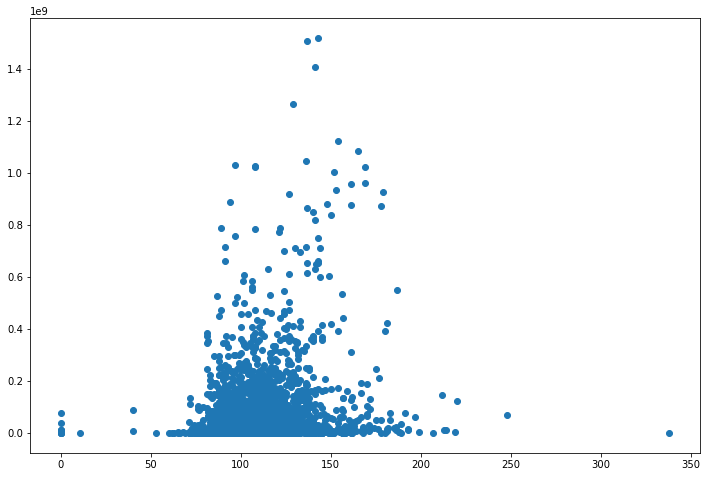

In [496]:
plt.figure(figsize=(12,8))
plt.scatter("runtime", "revenue", data=train)
plt.show()

In [497]:
train[pd.isna(train['runtime'])]

,budget,popularity,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,...,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
1336,6.000000e+06,0.292296,NaN,[],Released,NaN,Королёв,[],"[{'cast_id': 3, 'character': '–°–µ—Ä–≥–µ–π –ö–...","[{'credit_id': '52fe4db29251416c7513d819', 'de...",...,0,0,0,0,0,0,0,29,10,2007
2303,3.142419e+07,0.002229,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Happy Weekend,"[{'id': 572, 'name': 'sex'}, {'id': 596, 'name...","[{'cast_id': 0, 'character': 'Joachim Krippo',...",[],...,0,0,0,0,0,0,0,14,3,1996


In [498]:
train.iloc[2302, train.columns.get_loc('runtime')] = 90
train.iloc[1335, train.columns.get_loc('runtime')] = 130

SPOKEN LANGUAGES

In [499]:
train = train.drop(['spoken_languages'], axis=1)
train

,budget,popularity,runtime,status,tagline,title,Keywords,cast,crew,revenue,...,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,...,0,0,0,0,0,0,0,20,2,2015
2,4.000000e+07,8.248895,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,...,0,0,0,0,0,0,0,6,8,2004
3,3.300000e+06,64.299990,105.0,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,...,0,0,0,0,0,0,0,10,10,2014
4,1.200000e+06,3.174936,122.0,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,...,0,0,0,0,0,0,0,9,3,2012
5,3.142419e+07,1.148070,118.0,Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,...,0,0,0,0,0,0,0,5,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,...,0,0,0,0,0,0,0,22,4,1994
2997,3.142419e+07,3.727996,102.0,Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,...,0,0,0,0,0,0,0,28,3,2013
2998,6.500000e+07,14.482345,120.0,Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,...,0,0,0,0,0,0,0,11,10,1996


STATUS

In [500]:
for i,e in enumerate(train['status']):
    if(e!='Released'):
        print (i,e)

609 Rumored
1007 Rumored
1216 Rumored
1618 Rumored


In [501]:
train.iloc[609]#vabbè

budget                                                                        31424185.225012
popularity                                                                           5.121309
runtime                                                                                  71.0
status                                                                                Rumored
tagline                                     It Will Take All Her Magic to Rescue Her Friends!
title                                          The Swan Princess: Escape from Castle Mountain
Keywords                                    [{'id': 3071, 'name': 'prince'}, {'id': 4456, ...
cast                                        [{'cast_id': 2, 'character': 'Odette (voice)',...
crew                                        [{'credit_id': '52fe488bc3a36847f816cfd3', 'de...
revenue                                                                                273644
has_collection                                              

In [502]:
train = train.drop(['status'], axis=1)
train

,budget,popularity,runtime,tagline,title,Keywords,cast,crew,revenue,has_collection,...,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,...,0,0,0,0,0,0,0,20,2,2015
2,4.000000e+07,8.248895,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,...,0,0,0,0,0,0,0,6,8,2004
3,3.300000e+06,64.299990,105.0,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,...,0,0,0,0,0,0,0,10,10,2014
4,1.200000e+06,3.174936,122.0,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,...,0,0,0,0,0,0,0,9,3,2012
5,3.142419e+07,1.148070,118.0,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,...,0,0,0,0,0,0,0,5,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,0,...,0,0,0,0,0,0,0,22,4,1994
2997,3.142419e+07,3.727996,102.0,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,0,...,0,0,0,0,0,0,0,28,3,2013
2998,6.500000e+07,14.482345,120.0,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,0,...,0,0,0,0,0,0,0,11,10,1996


TAGLINE

In [503]:
train['hasTagline'] = train['tagline'].apply(lambda x: 0 if pd.isna(x) else 1)
train = train.drop(['tagline'], axis=1)
train

,budget,popularity,runtime,title,Keywords,cast,crew,revenue,has_collection,isBudgetDirty,...,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year,hasTagline
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,...,0,0,0,0,0,0,20,2,2015,1
2,4.000000e+07,8.248895,113.0,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,...,0,0,0,0,0,0,6,8,2004,1
3,3.300000e+06,64.299990,105.0,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,...,0,0,0,0,0,0,10,10,2014,1
4,1.200000e+06,3.174936,122.0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,...,0,0,0,0,0,0,9,3,2012,0
5,3.142419e+07,1.148070,118.0,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,1,...,0,0,0,0,0,0,5,2,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,0,1,...,0,0,0,0,0,0,22,4,1994,1
2997,3.142419e+07,3.727996,102.0,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,0,1,...,0,0,0,0,0,0,28,3,2013,0
2998,6.500000e+07,14.482345,120.0,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,0,0,...,0,0,0,0,0,0,11,10,1996,1


TITLE

In [504]:
train = train.drop(['title'], axis=1)
train

,budget,popularity,runtime,Keywords,cast,crew,revenue,has_collection,isBudgetDirty,genre_count,...,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year,hasTagline
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,1,...,0,0,0,0,0,0,20,2,2015,1
2,4.000000e+07,8.248895,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,4,...,0,0,0,0,0,0,6,8,2004,1
3,3.300000e+06,64.299990,105.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,1,...,0,0,0,0,0,0,10,10,2014,1
4,1.200000e+06,3.174936,122.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,2,...,0,0,0,0,0,0,9,3,2012,0
5,3.142419e+07,1.148070,118.0,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,1,2,...,0,0,0,0,0,0,5,2,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,0,1,2,...,0,0,0,0,0,0,22,4,1994,1
2997,3.142419e+07,3.727996,102.0,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,0,1,2,...,0,0,0,0,0,0,28,3,2013,0
2998,6.500000e+07,14.482345,120.0,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,0,0,4,...,0,0,0,0,0,0,11,10,1996,1


KEYWORDS

In [505]:
for i, e in enumerate(train['Keywords']):
    print (i)
    for comp in e:
        print(comp['name'])

0
time travel
sequel
hot tub
duringcreditsstinger
1
coronation
duty
marriage
falling in love
2
jazz
obsession
conservatory
music teacher
new york city
violence
montage
drummer
public humiliation
jazz band
young adult
music school
3
mystery
bollywood
police corruption
crime
india
missing husband
nerve gas
4
5
6
7
journalism
translation
television
manipulation of the media
iraq
reporter
woman director
8
island
pirate gang
puppet
treasure hunt
9
mockumentary
folk singer
10
underdog
philadelphia
transporter
italo-american
fight
love of one's life
publicity
boxer
independence
boxing match
training
lovers
surprise
world champion
amateur
victory
11
nerd
vacation
farce
jock
frame up
defector
12
male nudity
female nudity
adultery
parent child relationship
midlife crisis
coming out
first time
camcorder
virgin
nudity
film maker
estate agent
satire
loneliness
dark comedy
suburbia
coming of age
marijuana
exercise
bittersweet
affair
13
baseball bat
widow
recording contract
recording studio
russian m

nudity
sequel
sword fight
ninja
gang
violence
stabbing
sword duel
throwing star
194
dark comedy
independent film
195
iran
farmer
hearing impaired
196
telekinesis
psychokinesis
psychic
demon
mayan
197
usa president
agent
198
wrestling
sport
199
robbery
bar
winter
blackmail
hitman
bartender
crime boss
organized crime
mobster
pitbull
church
catholic
brooklyn new york city
ex-con
super bowl
abandoned puppy
200
hero
barn
spider
pig
egg
friendship
spring
uncle
friends
rescue
survival
talking animal
grass
family
desk
raincoat
talking pig
201
dancing
sex
dream
musical
police
bikini
swimming pool
beauty salon
romantic comedy
spaceship
romance
alien
furry
hospital
makeover
nosy neighbor
discotheque
valley girl
202
holiday
thanksgiving
freedom
duringcreditsstinger
3d
203
father son relationship
lake
springfield
the simpsons
duff beer
garbage
pig
pollution
environmental protection agency
quarantine
alcoholism
love
alaska
dysfunctional family
dysfunctional marriage
ecology
saving lives
first love
d

3d
379
jazz
biography
historical figure
380
rebel
journalist
journalism
loss of family
slavery
mercenary
diamond mine
sierra leone
bootlegger
fisherman
special unit
smuggling
genocide in rwanda
oppression
381
brother brother relationship
loss of brother
cambodia
chase
tiger
governor
royalty
travelling circus
archaeologist
382
sheriff
wyoming
hitman
bag of money
neo-noir
383
based on novel
st. petersburg russia
high society
imperial russia
tragic death
19th century
384
american football
trainer
training
american football coach
sport
american football stadium
385
holiday
france
film director
chaos
clumsy fellow
to drop brick
aftercreditsstinger
386
independent film
duringcreditsstinger
387
missionary
civilization
tribe
388
heist
betrayal
389
penalty
therapist
psychology
aggression
rage
anger
anger management
390
391
astronaut
spacewalk
392
393
holiday
christmas party
santa claus
toy
puppet
christmas
turboman
navidad
394
cross country race
all-star supporting cast
395
magic show
career
co

foster care
group home
562
deja vu
amnesia
hawaii
ladykiller
romantic comedy
563
london england
cook
restaurant
diva
career
kitchen
redemption
drug
drug addict
chef
come back
564
prison
rape
heroin
sequel
dirty cop
drug
heroin addict
cine quinqui
565
independent film
agoraphobia
566
texas
assault
alamo
mexican
mexican army
567
bounty hunter
based on novel
romance
framed
bail jumper
woman director
568
ex husband
woman director
569
bomb
helicopter
plutonium
laser
heist
fugitive
teenager
scientist
nuclear
science
project
570
london england
taxi
manchester city
submachine gun
gas station
survivor
daughter
laboratory
hospital
zombie
brutality
church
violence
rage
epidemic
military
virus
waking from coma
animal research
571
upper class
halloween
psychopath
urban legend
youth
satanic ritual
572
murder
violence
death of daughter
homicide detective
573
jew
based on play or musical
independent film
gay relationship
lesbian
bisexual
bisexual woman
574
love triangle
baby
sequel
pregnancy
unknown f

727
alcohol
one-night stand
bed
pregnancy and birth
condom
paternity
drug use
beard
unprotected sex
duringcreditsstinger
728
netherlands
jewel
jewel thief
729
bird
sequel
jungle
audition
amazon rainforest
parrots
730
krakow
heart disease
false identity
french
music
puppet
independent film
poland
doppelganger
parallel lives
warsaw
731
san francisco
marriage proposal
ruling class
vacation
interracial relationship
african american
dinner
doctor
art gallery
widower
miscegenation
publisher
732
gay
drag queen
homophobia
musical
van
australia
transgender
australian aborigine
733
transplantation
revenge
organ donation
734
fox
prejudice
conspiracy
urban
female protagonist
anthropomorphism
rabbit
rookie cop
missing person
injustice
stereotype
discrimination
3d
animals
735
becoming an adult
inventor
infant
family
736
ancient rome
epic
kaiser nero
737
suicide
music
high school
woman director
738
national security agency (nsa)
biography
surveillance
whistleblower
political thriller
739
dystopia
bas

bagved
√òverste hylde
908
document
biography
tv reporter
presidential elections
political scandal
909
parasite
found footage
910
911
nature
solitude
human nature
912
china
martial arts
tai chi
extortion
illegal matches
913
corruption
assassination
washington d.c.
rape
white house
usa president
daughter
government
suspense
secret service
secret service agent
914
germany
assassination
world war ii
nazis
prague
biography
female protagonist
third reich
operation anthropoid
915
samurai
japanese culture
based on manga
meiji period
916
ecstasy
drug dealing
drug
reference to family circus
high
bisexual man
multiple storylines
917
918
living together
love
open relationship
sexual relationship
sentiments
919
surfing
920
cemetery
infidelity
shower
nudity
exorcism
night
high school
shooting
possession
revenge
murder
locker room
priest
prom
blood
unfaithfulness
camp
slasher
teenager
splatter
female homosexuality
high school friends
sexual repression
locker
incest
ghost
school principal
prom queen
f

1089
therapist
musician
nervous breakdown
songwriter
pop music
the beach boys
psychotherapist
1090
dancing
artificial intelligence
distrust
isolation
technology
manipulation
friendship
deception
laboratory
robot
power outage
surveillance camera
consciousness
existentialism
lockdown
philosophical
robot human relationship
turing test
cybernetics
1091
1092
1093
italy
love at first sight
loss of father
patriarch
organized crime
mafia
lawyer
italian american
crime family
rise to power
mob boss
1940s
1094
holiday
london england
film making
christmas party
country house
room exchange
surrey
romantic comedy
los angeles
multiple storylines
woman director
christmas
1095
cuba
falsely accused
secret identity
computer virus
secret base
secret intelligence service
kgb
satellite
special car
cossack
electromagnetic pulse
time bomb
st. petersburg russia
ejection seat
red army
1096
drug dealer
greenhouse
police
drug
hoodlum
1097
1098
new york
based on novel
one-night stand
single
1099
remake
on the run


1316
mask
psychology
serial killer
hospital
teenager
series of murders
1317
1318
senate
fight
salesman
theft
car
interstate
1319
prostitute
capitalism
usa president
arena
congress
future
human experimentation
dystopia
army
stupidity
hibernation
dark comedy
social satire
brainwashing
surveillance
u.s. congress
dystopic future
mass media
1320
california
earthquake
catastrophe
disaster film
3d
san andreas
san andreas california
rescue operation
1321
fbi
dracula
fistfight
vampire hunter
superhero
based on comic
martial arts master
motorcycle
katana sword
blade
loss of friend
super villain
vampire slayer
fast motion scene
female vampire
1322
news broadcast
decision
fall
teen angst
independent film
fatal accident
flash forward
teenager
break-up
teenage boy
security guard
nonlinear timeline
torso cut in half
skateboarder
autumn
skate park
questioning
1323
1324
high school
school
woman director
1325
beach
wife husband relationship
lake
camping
rottweiler
sadism
forest
revenge
survival
fear
vio

jewish
1485
rape
sister sister relationship
lover (female)
pedophilia
sister
partnership
stalker
secret love
independent film
relationship
extramarital affair
family conflict
unhappiness
1486
televison
1487
1488
1489
love triangle
man between two women
coming of age
1490
war
drama
spanish
1491
1492
father son relationship
casual meeting
student of medicine
friends
valentine
male female relationship
open relationship
sexual humor
best friend
casual sex
best friends in love
duringcreditsstinger
fling
father son conflict
friends with benefit
1493
island
rave
weapon
student
based on video game
1494
bridesmaid
strip club
female friendship
reunion
drug use
wedding
wedding dress
childhood friends
woman director
bachelorette party
bitch
fat woman
1495
1496
saving the world
hero
marine corps
chaos
retirement
survivor
meteor
space invasion
alien
battlefield
survival
sergeant
los angeles
battle
danger
escapade
u.s. marine
heroic mission
evil alien
chaos and mayham
1497
brother sister relationship

1666
individual
taxi
transsexuality
fortune teller
film business
film making
film producer
vororte
film maker
boxer
film director
oddball
celebrity
morphine
movie studio
los angeles
drug addict
cult director
theremin
handgun
trick or treating
actor
transvestite
1667
austria
cemetery
famous score
black market
soviet troops
prater
british army
postwar period
occupying power
staged death
cover-up
romance
suspense
sewer
brit noir
amusement park
ferris wheel
film noir
vienna
zither
evasion
1668
chicago
sports team
ghetto
narration
college
sport
basketball
high school sports
independent film
inner city
high school student
1669
rape
earthquake
natural disaster
tsunami
1670
vampire
child vampire
remake
bully
young boy
biting
dead boy
hammer horror
1980s
1671
witch
suicide attempt
puberty
magic
black magic
sorcery
female friendship
teenager
hair loss
outsider
occult ritual
karma
newcomer
love spell
1672
missile
light
transformation
low-budget
alien
fireplace
los angeles
cell phone
rooftop
durin

√òverste hylde
foran
1844
independent film
aspiring singer
singer
los angeles
1845
brother brother relationship
martial arts
wheelchair
bangkok
thailand
sport
phuket
meister
revenge
muay thai
kick boxing
1846
netherlands
world war ii
1847
homosexuality
independent film
mockumentary
1848
musical
transformation
flower girl
colonel
wager
suitor
class differences
tutor
aristocrat
linguist
street
high society
misogynist
guttersnipe
class prejudice
opposites attract
1849
gang of smugglers
1850
video game
grandmother grandson relationship
man child
stoner
game tester
1851
film making
high school
sequel
serial killer
slasher
aftercreditsstinger
1852
drug smuggle
rapper
1853
stand-up comedy
live comedy
1854
friendship
high school
loneliness
teen angst
coming of age
teenage girl
best friend
dating
teenager
woman director
1855
brother brother relationship
dysfunctional family
india
train attendant
drinking syrup
healing
steward
catharsis
1856
artificial intelligence
secret identity
computer progr

1991
loss of son
serial killer
train
1992
suspense
1993
dc comics
superhero
based on comic
spin off
1994
prohibition
texas
gang war
whiskey
mafia
on the run
tommy gun
hired gun
1995
spy
cia
undercover
arms dealer
disaster
female spy
aftercreditsstinger
duringcreditsstinger
1996
based on novel
assault rifle
mercenary
libya
biography
based on true story
heroism
explosion
american abroad
death
21st century
cia agent
u.s. ambassador
1997
fire
hero
lie
career woman
photography
1998
california
assassin
infidelity
fetish
hitman
tycoon
court
satire
lawyer
inheritance
divorce
1999
soul
sleep
manipulation
future
dystopia
chaos
memory
duel
parallel world
tech noir
matrix
neo-noir
retrofuturism
2000
sport
pro wrestling
2001
2002
mass murder
song
brother
sister
aftercreditsstinger
2003
washington d.c.
telepathy
dna
mercenary
transformation
quarantine
hybrid
on the run
serial killer
mind reading
cloning
los angeles
astronaut
killing spree
virus
alien dna
2004
remake
alien
escape
alien invasion
alien

love affair
apartment
extramarital affair
murder mystery
2166
fbi
hydrogen bomb
secret lab
energy supply
conspiracy
aftercreditsstinger
2167
sequel
hangover
2168
chess
betrayal
2169
mask
wheelchair
guillotine
remake
morgue
wax museum
new york city
sculptor
wax
3d
proto-slasher
2170
dystopia
2171
dolphin
island
research
tourist
town
2172
saving the world
san francisco
uss enterprise-a
time travel
whale
marine biologist
vulcan
space opera
2173
2174
gun
winter
marriage proposal
flower
policeman
2175
saving the world
hero
key
skeleton
time travel
wretch
supernatural powers
aftercreditsstinger
sword and planet
2176
paris
barcelona spain
alcohol
roommate
single
travel
crush
student
relationship
break-up
youth
celebration
group of friends
2177
dancing
women
sex
karaoke
dream
pop singer
virgin
motel
graduation
kiss
friendship
high school
road trip
unfaithful boyfriend
hospital
singing
teenager
girl
rebellious daughter
on the road
father daughter relationship
chick flick
pop music
audition
teen

2339
2340
judge
architect
ghost world
hell
grim reaper
ghost
2341
college
murder
urban legend
slasher
killer
death
2342
2343
based on novel
nevada
coming out
farm
reno
lesbian
divorce
lgbt
woman director
2344
world war i
biplane
2345
2346
world war ii
normandy
allied
widerstand
steel helmet
soldier
2347
nasa
sexism
biography
mathematics
racial segregation
racism
scientist
space race
black woman
u.s. space program
discrimination
1960s
2348
vietnam veteran
washington d.c.
cemetery
vietnam war
soldier
2349
exorcism
holy water
religion and supernatural
vomit
christian
possession
profanity
priest
ouija board
satan
paranormal phenomena
girl
demon
strong language
disturbed child
crisis of faith
sfx
2350
hot dog costume
electro shock
fake school
strait jacket
croquet
sprinkler system
2351
riddle
treasure
heart
skeleton
treasure hunt
torture
violence
monkey
cult film
archaeologist
thuggee
conveyor belt
mine car
rope bridge
belching
child driving a car
eating brains
splits
indiana jones
archeolo

2559
vampire
light
darkness
battle for power
market
moscow
2560
girlfriend
daughter
father
teenager
2561
shyness
brother sister relationship
business man
2562
fish
amnesia
sequel
animation
talking animal
anthropomorphism
underwater
2563
adultery
extramarital affair
2564
music record
rock and roll
pop
hip-hop
fab four
blues
pop star
rapper
record producer
rock
music
music instrument
wedding
extramarital affair
aftercreditsstinger
2565
prison
father son relationship
homicide
begnadigung
release from prison
forgiveness
college
basketball
independent film
2566
coming of age
marijuana
summer
2567
2568
sword fight
animal
2569
helicopter
undercover
racism
prostitution
violence
2570
santa claus
nerd
faith
gift
bell
beard
north pole
chute
trestle
ticket
christmas
2571
2572
love triangle
past
zombie
tomb
grave robbing
flashback
treasure hunter
2573
videoband
unofficial remake
2574
england
rape
country life
primal fear
revenge
thriller
rural setting
violence
cult film
2575
stand-up comedy
2576
br

mother son relationship
haunted by the past
censorship
movie theatre
flashback
2766
chocolate
mayor
praline
single
mother daughter relationship
2767
survivor
violence
self help guru
tricycle
prosthetic arm
pig mask
3d
2768
michigan
crisis
fire fighting
detroit
woman director
2769
brother sister relationship
wheelchair
hypnosis
investigation
cover-up
ufo
alaska
disappearance
hospital
alien abduction
patient
psychotherapy
fake documentary
based on supposedly true story
nome alaska
faked footage
audio cassette
ancient astronaut
anchorage alaska
police fake
duringcreditsstinger
2770
marvel comic
sequel
superhero
based on comic
vision
superhero team
duringcreditsstinger
marvel cinematic universe
3d
2771
artificial intelligence
farewell
homesickness
nasa
extraterrestrial technology
flying saucer
time travel
adventure
alien
kids and family
dog
2772
based on novel
soviet union
russian
murder
serial killer
military
child murder
stalinism
1950s
2773
islam
muslim
car bomb
fbi agent
2774
prostitut

rope
princess
thief
suitor
disguise
apple
2993
new york
airport
marriage proposal
translation
craftsman
stewardess
illegal immigration
language barrier
jfk international airport
immigration law
fast food restaurant
security camera
jazz musician
saxophonist
autograph
passport
eastern europe
friendship
2994
sport
anti semitism
2995
prison
sex
handcuffs
waitress
fight
fireworks
nudity
volcano
navy
road trip
money
escape
convertible
scam
inmate
escort
military
embezzlement
nervous
2996
sweden
punk
based on comic
all girl band
girl band
foreign
2997
assassination
amnesia
hostage
chase
dark comedy
teacher
escape
single mother
timebomb
candlelight vigil
rogue agent
street shootout
ex cia agent
christmas parade
2998
beach
honeymoon
bride
chance
risk
relation
long island
romantic comedy
comedy
scuba diving
unfaithfulness
los angeles
art gallery
dance class
opposites attract
caribbean
commitment
dance club
neurotic
bagpipes
chance encounter
insurance risk manager
2999
cia
airport
hero
fight
kidn

In [506]:
train['list_of_keywords'] = train['Keywords'].apply(lambda x: [comp['name'] for comp in x])

In [507]:
list_of_keywords = []
for l in train['list_of_keywords']:
    for key in l:
        list_of_keywords.append(key)

print(len(list_of_keywords))
unique_keywords = set(list_of_keywords)
print(len(unique_keywords))
top_50_keys_pair = Counter(list_of_keywords).most_common(50)
top_50_keys = []
for p in top_50_keys_pair:
    top_50_keys.append(p[0])
Counter(list_of_keywords).most_common(50)

21680
7400


[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73),
 ('revenge', 73),
 ('friendship', 72),
 ('sex', 71),
 ('suspense', 67),
 ('sequel', 66),
 ('love', 64),
 ('police', 64),
 ('teenager', 61),
 ('nudity', 57),
 ('female nudity', 53),
 ('drug', 52),
 ('prison', 50),
 ('musical', 49),
 ('high school', 49),
 ('los angeles', 48),
 ('new york', 47),
 ('family', 45),
 ('father son relationship', 44),
 ('kidnapping', 41),
 ('investigation', 41),
 ('wedding', 40),
 ('3d', 40),
 ('detective', 38),
 ('london england', 38),
 ('paris', 37),
 ('based on comic', 37),
 ('robbery', 36),
 ('based on true story', 35),
 ('dying and death', 34),
 ('escape', 34),
 ('alien', 34),
 ('brother brother relationship', 34),
 ('prostitute', 34),
 ('suicide', 33),
 ('rape', 33),
 ('corruption', 33),
 ('death', 32),
 ('superhero', 32),
 (

In [508]:
train['isInTop50Keywords'] = pd.Series([1 if list(set(x) & set(top_50_keys)) != [] else 0 for x in train['list_of_keywords']], index =list(range(1,3001)))

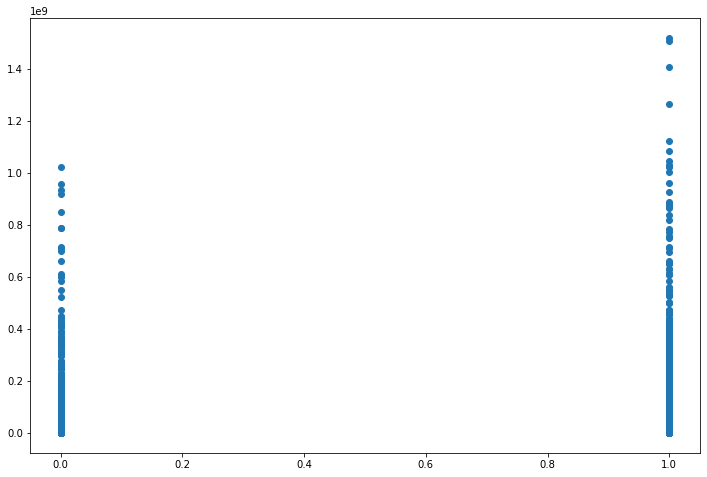

In [509]:
plt.figure(figsize=(12,8))
plt.scatter("isInTop50Keywords", "revenue", data=train)
plt.show()

In [510]:
train = train.drop(['isInTop50Keywords'], axis=1)

In [511]:
train['keywordsCount'] = train['list_of_keywords'].apply(lambda x: len(x))

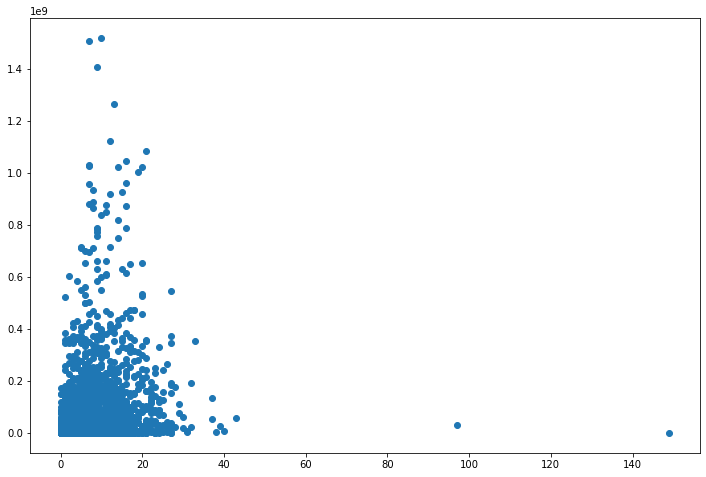

In [512]:
plt.figure(figsize=(12,8))
plt.scatter("keywordsCount", "revenue", data=train)
plt.show()

In [513]:
train = train.drop(['Keywords'], axis=1)
train = train.drop(['list_of_keywords'], axis=1)

In [514]:
train

,budget,popularity,runtime,cast,crew,revenue,has_collection,isBudgetDirty,genre_count,hasHomepage,...,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year,hasTagline,keywordsCount
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,1,0,...,0,0,0,0,0,20,2,2015,1,4
2,4.000000e+07,8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,4,0,...,0,0,0,0,0,6,8,2004,1,4
3,3.300000e+06,64.299990,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,1,1,...,0,0,0,0,0,10,10,2014,1,12
4,1.200000e+06,3.174936,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,2,1,...,0,0,0,0,0,9,3,2012,0,7
5,3.142419e+07,1.148070,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,1,2,0,...,0,0,0,0,0,5,2,2009,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,0,1,2,0,...,0,0,0,0,0,22,4,1994,1,19
2997,3.142419e+07,3.727996,102.0,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,0,1,2,0,...,0,0,0,0,0,28,3,2013,0,6
2998,6.500000e+07,14.482345,120.0,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,0,0,4,0,...,0,0,0,0,0,11,10,1996,1,14


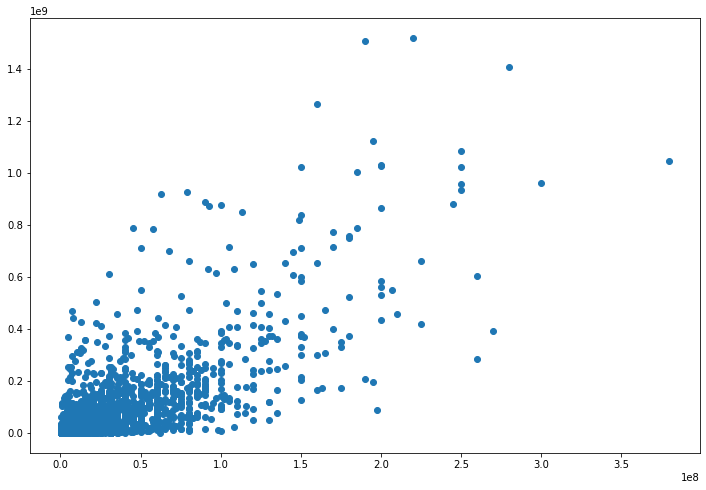

In [515]:
plt.figure(figsize=(12,8))
plt.scatter("budget", "revenue", data=train)
plt.show()